[0.35425 0.144   0.12125 0.32125 0.1635 ] [0.39175 0.177   0.17575 0.61475 0.1955 ]


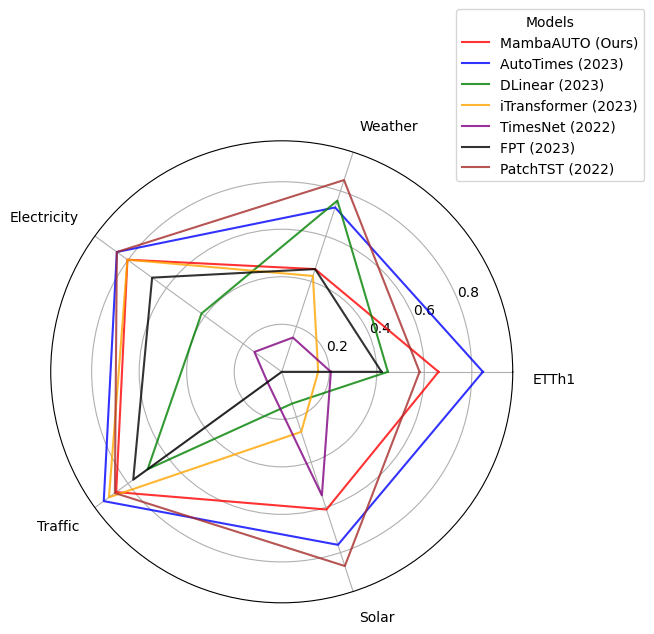

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
labels=np.array(['ETTh1', 'Weather', 'Electricity', 'Traffic', 'Solar'])  # 变量名
data1 = np.array([0.367, 0.162, 0.132, 0.362, 0.176])  # 第一组数据点
data2 = np.array([0.360, 0.153, 0.129, 0.343, 0.171])  # 第二组数据点
data3 = np.array([0.375, 0.152, 0.153, 0.410, 0.191])  # 第三组数据点
data4 = np.array([0.386, 0.163, 0.132, 0.351, 0.187])  # 第四组数据点
data5 = np.array([0.384, 0.172, 0.168, 0.593, 0.178])  
data6 = np.array([0.376, 0.162, 0.139, 0.388, 0.178]) # 0.178 is dummy (set to 0 after normalization)
data7 = np.array([0.370, 0.149, 0.129, 0.360, 0.168])
data = np.array([data1, data2, data3, data4, data5, data6, data7])

min_values = np.zeros(data.shape[1])
max_values = np.zeros(data.shape[1])

for i in range(data.shape[1]):
    Q1 = np.percentile(data[:, i], 25)
    Q3 = np.percentile(data[:, i], 75)
    IQR = Q3 - Q1

    min_val = np.min(data[:, i]) - 0.5 * IQR
    max_val = np.max(data[:, i]) + 0.5 * IQR

    min_values[i]=min_val
    max_values[i]=max_val

print(min_values, max_values)

data1 = 1-(data1-min_values) / (max_values-min_values)
data2 = 1-(data2-min_values) / (max_values-min_values)
data3 = 1-(data3-min_values) / (max_values-min_values)
data4 = 1-(data4-min_values) / (max_values-min_values)
data5 = 1-(data5-min_values) / (max_values-min_values)
data6 = 1-(data6-min_values) / (max_values-min_values)
data7 = 1-(data7-min_values) / (max_values-min_values)

# 计算角度
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()

# 数据闭合
data1 = np.concatenate((data1, [data1[0]]))
data2 = np.concatenate((data2, [data2[0]]))
data3 = np.concatenate((data3, [data3[0]]))
data4 = np.concatenate((data4, [data4[0]]))
data5 = np.concatenate((data5, [data5[0]]))
data6 = np.concatenate((data6, [data6[0]]))
data7 = np.concatenate((data7, [data7[0]]))
data6[-2]=0
angles += angles[:1]

# 绘图
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.plot(angles, data1, color='red', alpha=0.8, label='MambaAUTO (Ours)')
ax.plot(angles, data2, color='blue', alpha=0.8, label='AutoTimes (2023)')
ax.plot(angles, data3, color='green', alpha=0.8, label='DLinear (2023)')
ax.plot(angles, data4, color='orange', alpha=0.8, label='iTransformer (2023)')
ax.plot(angles, data5, color='purple', alpha=0.8, label='TimesNet (2022)')
ax.plot(angles, data6, color='black', alpha=0.8, label='FPT (2023)')
ax.plot(angles, data7, color='brown', alpha=0.8, label='PatchTST (2022)')

# 添加标签
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=10, color='black', verticalalignment='baseline')
for label, angle in zip(ax.get_xticklabels(), angles[:-1]):
    label.set_horizontalalignment('left' if angle < np.pi/2 or angle > 3*np.pi/2 else 'right')
    label.set_verticalalignment('bottom' if angle > 0 and angle < np.pi else 'top')
# 添加图例
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.3), ncol=1, frameon=True, title="Models")
# 显示图形

plt.savefig("radar.pdf", format="pdf", bbox_inches="tight")